In [1]:
# import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load data on player stats and salaries
df = pd.read_csv('nba_2022-23_all_stats_with_salary.csv', index_col=0)

# Fill columns with NaN values with zeros
columns_to_fill = ['FT%', '3P%', '2P%', 'eFG%', 'FG%',  '3PAr', 'FTr', 'TOV%', 'TS%']
df[columns_to_fill] = df[columns_to_fill].fillna(0)

# Display first five rows of dataframe
df.head()

,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9


In [2]:
# Select players played 25 or more games
df = df[df['GP'] >= 25]

In [3]:
# Select the various explanatory variables such as PPG APG as features 
X = df[['Player Name', 'Age','GP', 'GS', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']]



# Target is salary
y = df['Salary']

In [4]:
from sklearn.feature_selection import mutual_info_regression, SelectFromModel
from sklearn.linear_model import LassoCV


# Calculate the correlation matrix
correlation_matrix = X.drop(['Player Name'], axis=1).corr()

# Find highly correlated features
corr_threshold = 0.8  # Adjust the correlation threshold as needed
correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            # Keep one feature and add the other to the set of correlated features to be dropped
            if colname_i not in correlated_features:
                correlated_features.add(colname_j)


# Drop the correlated features
X_filtered = X.drop(columns=correlated_features)
X_filtered.drop(['Player Name'], axis=1, inplace=True)

# LASSO Regression for additional feature selection
lasso = LassoCV()
lasso.fit(X_filtered, y)

# Use SelectFromModel to get selected features based on LASSO coefficients
sfm = SelectFromModel(lasso, prefit=True)
selected_features_lasso = X_filtered.columns[sfm.get_support()]

# Convert to a DataFrame if needed
selected_features_df = pd.DataFrame(list(selected_features_lasso), columns=['Selected_Features'])

print(selected_features_df)


   Selected_Features
0                Age
1                 GP
2                3PA
3                3P%
4                TRB
5                STL
6                 PF
7               3PAr
8               TRB%
9               AST%
10              BLK%
11              TOV%
12              USG%
13              DBPM
14              VORP


In [5]:
# Import necessary modules

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Train-Test Split
train_df, test_df, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = train_df[selected_features_lasso]
X_test = test_df[selected_features_lasso]

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Define and Train Regression Models
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=42)),
    ('Random Forest Regressor', RandomForestRegressor(random_state=42)),
    ('Support Vector Regressor', SVR(kernel='linear')),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(random_state=42)),
    ('K-Nearest Neighbors Regressor', KNeighborsRegressor()),
    ('XGBoost Regressor', XGBRegressor()),
    ('CatBoost Regressor', CatBoostRegressor(verbose=0))
]
   # Define empty lists to store results
mse_results = []
r2_results = []

# Train and evaluate models
for model_name, model in models:
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate MSE and R2
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to lists
    mse_results.append(mse)
    r2_results.append(r2)
    
    # Print results
    print(f'Model: {model_name}')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'R-squared (R2): {r2:.4f}')
    print('---')

Model: Linear Regression
Mean Squared Error (MSE): 37576458850300.0000
R-squared (R2): 0.7589
---
Model: Ridge Regression
Mean Squared Error (MSE): 37608802136730.9766
R-squared (R2): 0.7587
---
Model: Lasso Regression
Mean Squared Error (MSE): 37576465214530.6328
R-squared (R2): 0.7589
---
Model: Decision Tree Regressor
Mean Squared Error (MSE): 80011688192916.5156
R-squared (R2): 0.4866
---
Model: Random Forest Regressor
Mean Squared Error (MSE): 39549458189751.7266
R-squared (R2): 0.7462
---
Model: Support Vector Regressor
Mean Squared Error (MSE): 199751026808638.9062
R-squared (R2): -0.2818
---
Model: Gradient Boosting Regressor
Mean Squared Error (MSE): 35154571673973.5273
R-squared (R2): 0.7744
---
Model: K-Nearest Neighbors Regressor
Mean Squared Error (MSE): 50952034159615.2422
R-squared (R2): 0.6730
---
Model: XGBoost Regressor
Mean Squared Error (MSE): 51815939879405.6797
R-squared (R2): 0.6675
---
Model: CatBoost Regressor
Mean Squared Error (MSE): 36011256708766.6016
R-squ

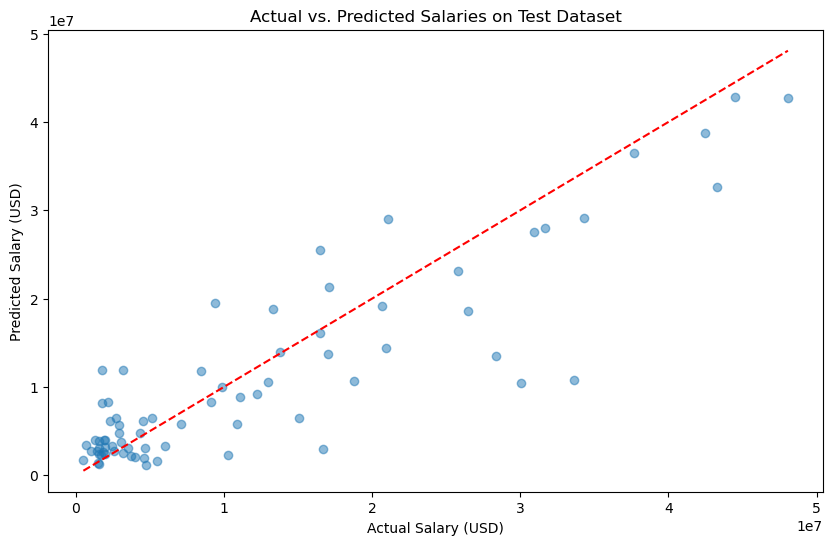

Mean Squared Error (MSE): 35154571673973.5273
R-squared (R2): 0.7744


In [6]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain the GB Regressor on the full training data
rf_model =  GradientBoostingRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Calculate MSE and R2 on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Get predictions, actual values, and player names for the test set into a dataframe
predictions_df = pd.DataFrame({
    'Player Name': test_df['Player Name'],
    'Actual Salary': y_test,
    'Predicted Salary': y_pred
})

# Plot actual vs. predicted salaries
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Salaries on Test Dataset')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')


plt.show()

# Print MSE and R2
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R2): {r2:.4f}')

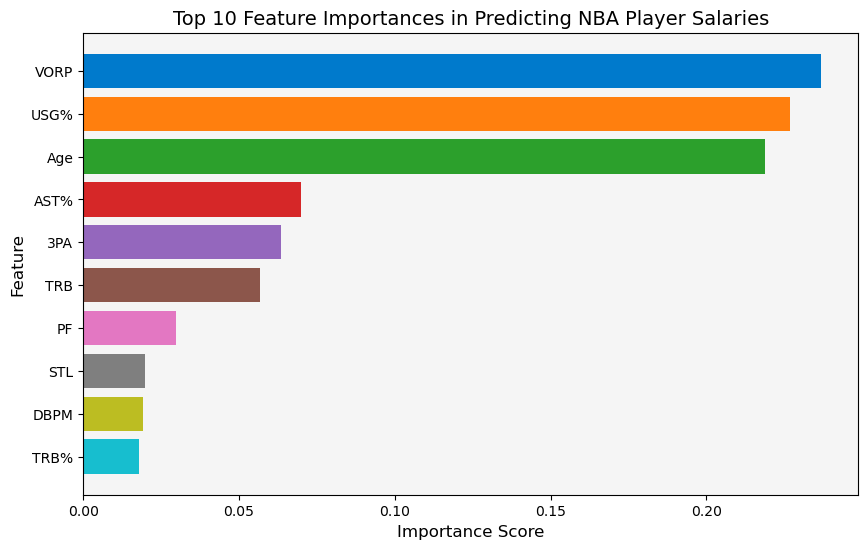

In [7]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to associate feature names with their importance scores
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Set a stylish color palette
colors = ['#007acc', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create an eye-catching horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color=colors)
plt.title('Top 10 Feature Importances in Predicting NBA Player Salaries', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top

# Add a cool background
ax = plt.gca()
ax.set_facecolor('#f5f5f5')

plt.show()

In [8]:
# Calculate absolute and percentage difference between actual salary and predicted salary
predictions_df['Absolute Difference'] = predictions_df['Actual Salary'] - predictions_df['Predicted Salary']
predictions_df['Percentage Difference'] = (predictions_df['Absolute Difference'] / predictions_df['Predicted Salary']) * 100

predictions_df.head()

,Player Name,Actual Salary,Predicted Salary,Absolute Difference,Percentage Difference
203,Jalen Smith,4670160,3.038670e+06,1.631490e+06,53.690930
34,Shai Gilgeous-Alexander,30913750,2.753312e+07,3.380628e+06,12.278403
15,Jimmy Butler,37653300,3.653262e+07,1.120683e+06,3.067624
331,Jalen McDaniels,1930681,3.977297e+06,-2.046616e+06,-51.457464
58,Aaron Gordon,20690909,1.918627e+07,1.504635e+06,7.842245


In [9]:
predictions_df.sort_values(by='Percentage Difference', ascending=False).head(5)

,Player Name,Actual Salary,Predicted Salary,Absolute Difference,Percentage Difference
78,Collin Sexton,16700000,2.956043e+06,1.374396e+07,464.944337
118,Mo Bamba,10300000,2.265138e+06,8.034862e+06,354.718471
202,Ty Jerome,4728948,1.138166e+06,3.590782e+06,315.488525
186,Dyson Daniels,5508600,1.627977e+06,3.880623e+06,238.370964
26,Andrew Wiggins,33616770,1.078876e+07,2.282801e+07,211.590538


Model: Linear Regression
Mean Squared Error (MSE): 37576458850300.0000
R-squared (R2): 0.7589
---
Model: Ridge Regression
Mean Squared Error (MSE): 37608802136730.9766
R-squared (R2): 0.7587
---
Model: Lasso Regression
Mean Squared Error (MSE): 37576465214530.6328
R-squared (R2): 0.7589
---
Model: Decision Tree Regressor
Mean Squared Error (MSE): 80011688192916.5156
R-squared (R2): 0.4866
---
Model: Random Forest Regressor
Mean Squared Error (MSE): 39549458189751.7266
R-squared (R2): 0.7462
---
Model: Support Vector Regressor
Mean Squared Error (MSE): 199751026808638.9062
R-squared (R2): -0.2818
---
Model: Gradient Boosting Regressor
Mean Squared Error (MSE): 35154571673973.5273
R-squared (R2): 0.7744
---
Model: K-Nearest Neighbors Regressor
Mean Squared Error (MSE): 50952034159615.2422
R-squared (R2): 0.6730
---
Model: XGBoost Regressor
Mean Squared Error (MSE): 51815939879405.6797
R-squared (R2): 0.6675
---
Model: CatBoost Regressor
Mean Squared Error (MSE): 36011256708766.6016
R-squ

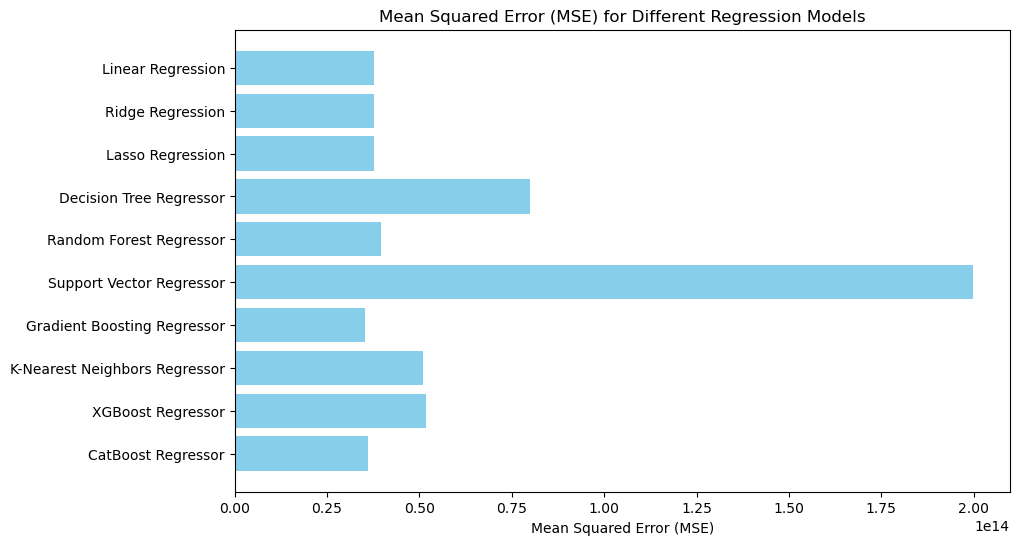

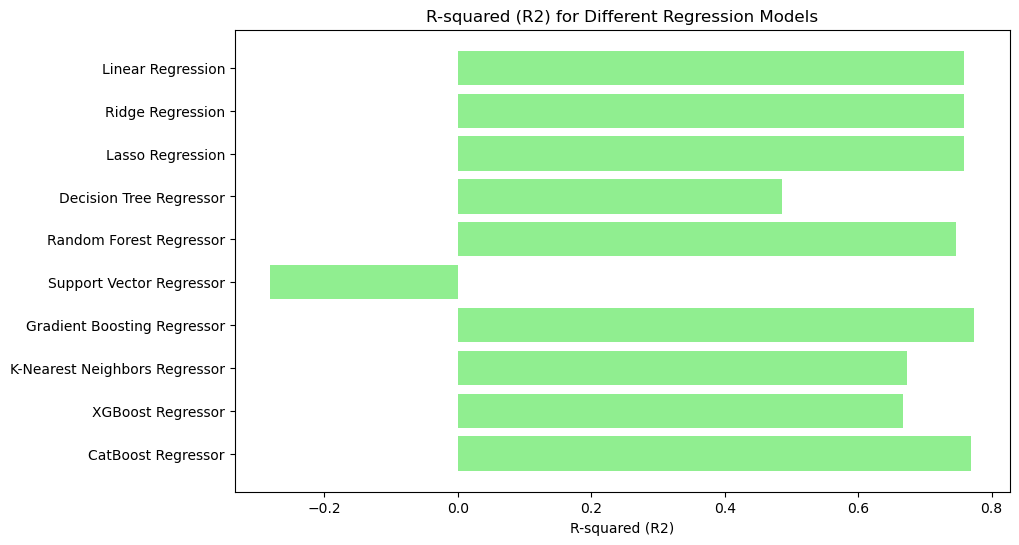

In [10]:
import matplotlib.pyplot as plt

# Define empty lists to store results
mse_results = []
r2_results = []

# Train and evaluate models
for model_name, model in models:
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate MSE and R2
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to lists
    mse_results.append(mse)
    r2_results.append(r2)
    
    # Print results
    print(f'Model: {model_name}')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'R-squared (R2): {r2:.4f}')
    print('---')

# Plot MSE and R2 for each model
plt.figure(figsize=(10, 6))
plt.barh([model[0] for model in models], mse_results, color='skyblue')
plt.xlabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) for Different Regression Models')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh([model[0] for model in models], r2_results, color='lightgreen')
plt.xlabel('R-squared (R2)')
plt.title('R-squared (R2) for Different Regression Models')
plt.gca().invert_yaxis()
plt.show()